<a href="https://colab.research.google.com/github/toche7/mdsLab3/blob/student/Lab5_PolynomialFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5. Logistic Regression Model and Higher Order with Polynomial Feature

version 001


Classification Models มีหลายนั้นมีมากมาย ใน lab นี้จะสรุปตัวหลักๆ เพื่อให้ได้รู้จักและได้ทดลองใช้กัน แต่ก่อนอื่นลองดูข้อมูลที่จะใช้ใน lab นี้กันก่อน


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/toche7/DataSets/main/admit.csv")
y = data.Label

In [4]:
data

,SubjectA,SubjectB,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [5]:
X = data[['SubjectA','SubjectB']]
X

,SubjectA,SubjectB
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [6]:
X.shape

(100, 2)

<Figure size 1000x600 with 0 Axes>

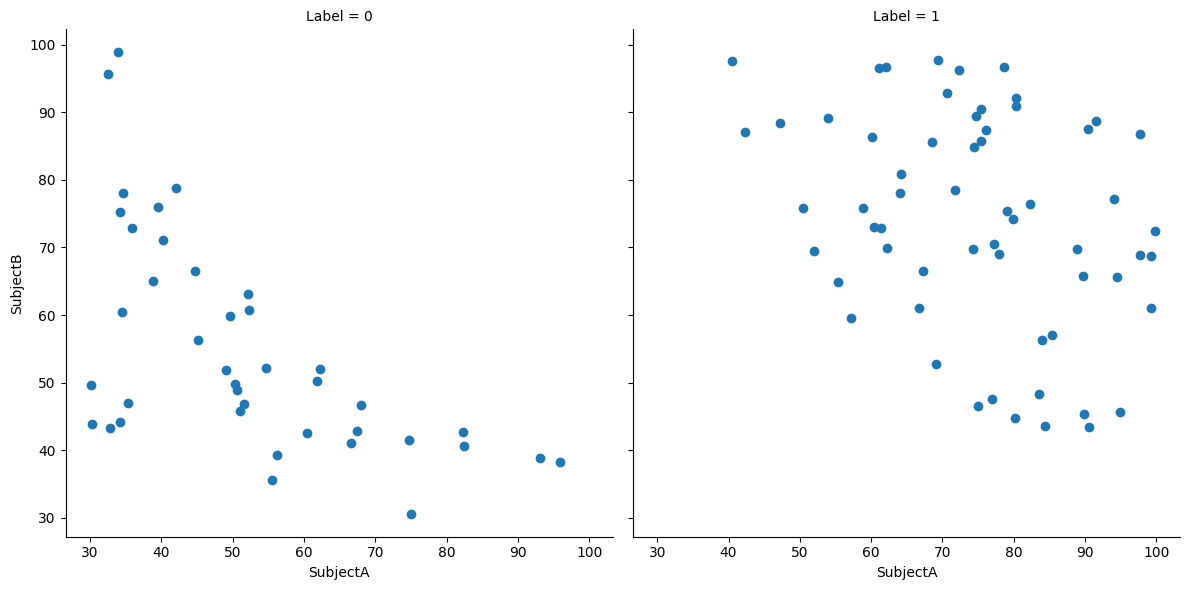

<Figure size 1000x600 with 0 Axes>

In [7]:
import seaborn as sns
sns.FacetGrid(data, col = 'Label', height=6).map(plt.scatter, 'SubjectA', 'SubjectB');
plt.figure(figsize=(10, 6))


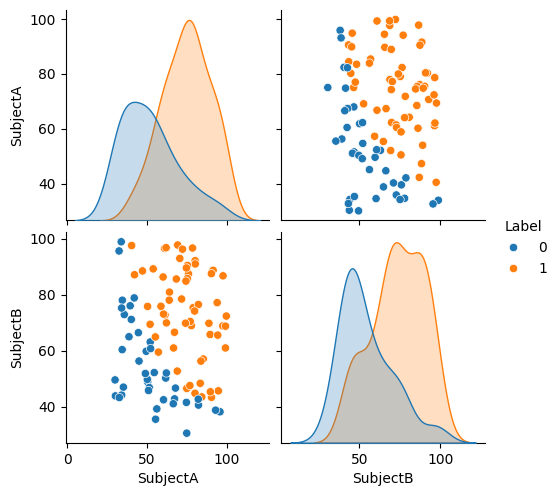

In [8]:
sns.pairplot(data,hue= 'Label')

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [10]:
logreg.fit(X,y)

LogisticRegression()

In [11]:
logreg.score(X,y)

0.89

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


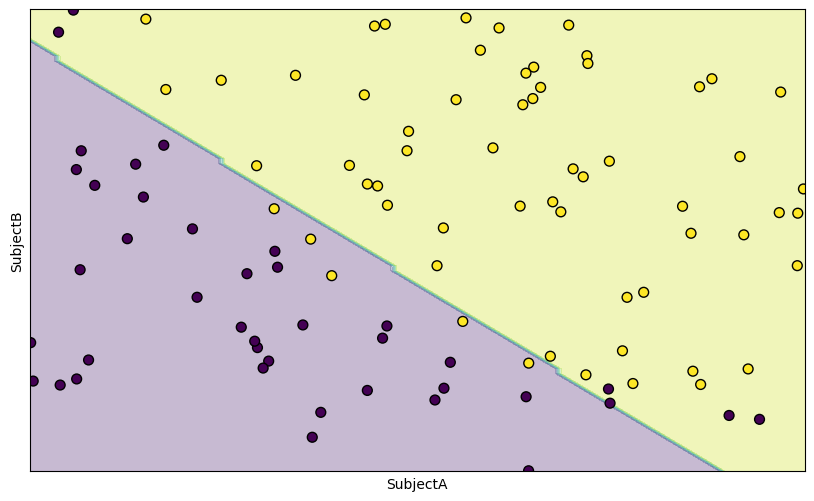

In [26]:
# prompt: create the decision boundary of model logregPoly

import matplotlib.pyplot as plt
import numpy as np

x_min, x_max = X['SubjectA'].min() - 0.1, X['SubjectA'].max() + 0.1
y_min, y_max = X['SubjectB'].min() - 0.1, X['SubjectB'].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = logreg.predict((np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(X_poly_df['SubjectA'], X_poly_df['SubjectB'], c=y, s=50, edgecolors='k')
plt.xlabel('SubjectA')
plt.ylabel('SubjectB')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [12]:
# prompt: create the higher order of feature as polynomial of X

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

print(X_poly.shape)


(100, 5)


In [18]:
type(X_poly)
X_poly_df = pd.DataFrame(X_poly, columns = poly_features.get_feature_names_out())
X_poly_df

,SubjectA,SubjectB,SubjectA^2,SubjectA SubjectB,SubjectB^2
0,34.623660,78.024693,1198.797806,2701.500406,6087.852689
1,30.286711,43.894998,917.284849,1329.435094,1926.770808
2,35.847409,72.902198,1285.036716,2613.354893,5314.730477
3,60.182599,86.308552,3621.945269,5194.273014,7449.166165
4,79.032736,75.344376,6246.173368,5954.672216,5676.775061
...,...,...,...,...,...
95,83.489163,48.380286,6970.440296,4039.229555,2340.652054
96,42.261701,87.103851,1786.051355,3681.156888,7587.080849
97,99.315009,68.775409,9863.470974,6830.430397,4730.056948
98,55.340018,64.931938,3062.517544,3593.334590,4216.156573


In [19]:
from sklearn.linear_model import LogisticRegression
logregPoly = LogisticRegression()

In [20]:
logregPoly.fit(X_poly_df,y)

LogisticRegression()

In [21]:
logregPoly.score(X_poly_df,y)

1.0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


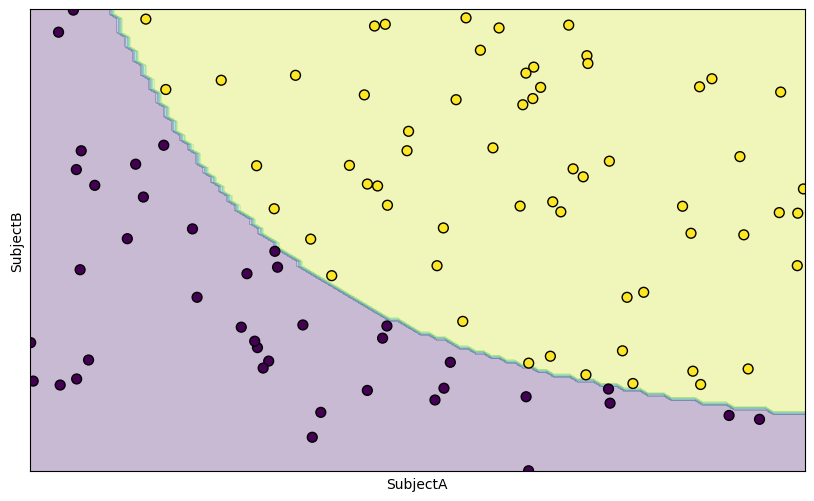

In [23]:
# prompt: create the decision boundary of model logregPoly

import matplotlib.pyplot as plt
import numpy as np

x_min, x_max = X_poly_df['SubjectA'].min() - 0.1, X_poly_df['SubjectA'].max() + 0.1
y_min, y_max = X_poly_df['SubjectB'].min() - 0.1, X_poly_df['SubjectB'].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = logregPoly.predict(poly_features.fit_transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(X_poly_df['SubjectA'], X_poly_df['SubjectB'], c=y, s=50, edgecolors='k')
plt.xlabel('SubjectA')
plt.ylabel('SubjectB')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
